# Group 29 Project Proposal: An Investigation of Distinguishing the Presence and Absence of Heart Disease

## Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Heart disease is any type of condition that affects the structure or function of the heart often caused by high blood pressure, high cholestorol, and smoking. Unfortunately, in the United States of America, heart disease-related complications (e.g. heart attacks) are the leading cause of death - averaging around 659,000 deaths each year. 

Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

I posit the question: "<b>How accurate is KNN classification at detecting the presence of heart disease?</b>" to investigate the key factors behind heart disease using a <i>K-nearest neighbors algorithm</i> on the <i>Heart Disease Data Set</i> donated by David W. Aha. This dataset contains 14 variables and 303 observations. The column names are listed below:

1. Age
2. Sex
3. Chest Pain Type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. Resting Blood Pressure (in mm Hg on admission to the hospital)
5. Serum Cholestorol in mg/dl
6. Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)
7. Resting Electrocardiographic Results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 
8. Maximum Heart Rate Achieved
9. Exercised Induced Angina (1 = yes; 0 = no)
10. ST Depression induced by exercise relative to rest
11. The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12. The number of major vessels (0 - 3) colored by fluoroscopy 
13. Thalassemia Blood Disorder (3 = normal; 6 = fixed defect; 7 = reversable defect)
    - this disorder causes red blood cells to carry less oxygen to the heart
14. Diagnosis of Heart Disease (1 = presence; 0 = absence) 

## Preliminary Exploratory Data Analysis

In [30]:
library(tidyverse)
library(tidymodels)
# for data reproducibility
set.seed(3)

Next, I upload and load the data file into Jupyter Notebook as a R data frame. 

This data is relatively tidy as each column contains a single variable, each row contains a single observation, and each cell contains a single measurement. 

However, I perform some wrangling improvements:
- Adding column names for each variable
- Converting values >1 in the diagnosis column to be 1 (0 = absence of heart disease, 1 = presence of heart disease)
    - NOTE: the original dataset classified this column with values between 0 to 4, with 0 representing the absence of heart disease and all values >1 representing the severity of the presence of heart disease
- Converting the diagnosis variable to be of factor data type
- Converting the diagnosis variable values (0, 1) to be replaced by "<b>Absence</b>" and "<b>Presence</b>" respectively
- Converting the major_vessels and thal variables to be of numeric data type
- Removing 6 observations with missing data

In [25]:
heart_disease <- read_csv("data/processed.cleveland.data",
                          col_names = c("age", "sex", "chest_pain_type", "resting_blood_sugar", "cholestorol", "fasting_blood_sugar", "electrocardio_results", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_peak_slope", "major_vessels", "thal", "diagnosis"))

heart_disease[c("diagnosis")][which(heart_disease$diagnosis > 1), ] <- 1

heart_disease <- heart_disease %>%
    mutate(major_vessels = as.numeric(major_vessels)) %>%
    mutate(thal = as.numeric(thal)) 

heart_disease <- heart_disease %>%
    mutate(diagnosis = as.factor(ifelse(diagnosis == 1, "Presence", "Absence")))

heart_disease <- na.omit(heart_disease)

heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_sugar = col_double(),
  cholestorol = col_double(),
  fasting_blood_sugar = col_double(),
  electrocardio_results = col_double(),
  max_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  ST_depression = col_double(),
  ST_peak_slope = col_double(),
  major_vessels = col_character(),
  thal = col_character(),
  diagnosis = col_double()
)



                    age                     sex         chest_pain_type 
                      0                       0                       0 
    resting_blood_sugar             cholestorol     fasting_blood_sugar 
                      0                       0                       0 
  electrocardio_results          max_heart_rate exercise_induced_angina 
                      0                       0                       0 
          ST_depression           ST_peak_slope           major_vessels 
                      0                       0                       4 
                   thal               diagnosis 
                      2                       0 


age,sex,chest_pain_type,resting_blood_sugar,cholestorol,fasting_blood_sugar,electrocardio_results,max_heart_rate,exercise_induced_angina,ST_depression,ST_peak_slope,major_vessels,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Absence
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Presence
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Absence
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Absence
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Absence
62,0,4,140,268,0,2,160,0,3.6,3,2,3,Presence
57,0,4,120,354,0,0,163,1,0.6,1,0,3,Absence
63,1,4,130,254,0,2,147,0,1.4,2,1,7,Presence


Now, I choose the predictors using the forward selection method to preserve only the most relevant predictors that will provide the most accurate model. Based on the results, I will choose seven predictors because the row with int = 7 tends to have one of the higher estimated accuracy (around 85%) and also experiences the least amount of fluctuations of the accuracy because the rows above and below differ only by 1-2%. The predictors I will choose are <b>age, sex, chest_pain_type, resting_blood_sugar, cholestorol, max_heart_rate, and thal</b>. These predictors are mostly quantitative and are the most meaningful to the average person. Choosing 7 predictors (the median of 14 variables) also decreases the risk of overfitting or underfitting.

In [27]:
names <- colnames(heart_disease %>% select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(heart_disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ thal,0.7645198
2,diagnosis ~ thal+major_vessels,0.7746328
3,diagnosis ~ thal+major_vessels+chest_pain_type,0.8485876
4,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina,0.8351977
5,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina+age,0.8419209
6,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina+age+max_heart_rate,0.8419209
7,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina+age+max_heart_rate+ST_depression,0.8487006
8,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina+age+max_heart_rate+ST_depression+resting_blood_sugar,0.8553672
9,diagnosis ~ thal+major_vessels+chest_pain_type+exercise_induced_angina+age+max_heart_rate+ST_depression+resting_blood_sugar+fasting_blood_sugar,0.8553672


The data is then split into training and testing data. 

In [31]:
heart_disease_split <- initial_split(heart_disease, prop = 0.8, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
Absence,129,53.9749
Presence,110,46.0251


Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

### Number of Observations Per Class

In [33]:
heart_disease_proportions <- heart_disease_train %>%
    group_by(diagnosis) %>%
    summarize(n = n()) %>%
    mutate(percent = 100 * n / nrow(heart_disease_train))

heart_disease_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
Absence,129,53.9749
Presence,110,46.0251


### Mean Predictor Values

In [34]:
heart_disease_predictors <- heart_disease_train %>%
    select(age, sex, chest_pain_type, resting_blood_sugar, cholestorol, max_heart_rate, thal) %>%
    map_df(mean)

heart_disease_predictors

age,sex,chest_pain_type,resting_blood_sugar,cholestorol,max_heart_rate,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.53556,0.6861925,3.146444,131.8536,247.159,149.8996,4.753138


### Number of Missing Observations
- NOTE: I removed all the missing observations in the original dataset as part of my wrangling process.

In [36]:
naCols <- colSums(is.na(heart_disease_train))

print(naCols)

                    age                     sex         chest_pain_type 
                      0                       0                       0 
    resting_blood_sugar             cholestorol     fasting_blood_sugar 
                      0                       0                       0 
  electrocardio_results          max_heart_rate exercise_induced_angina 
                      0                       0                       0 
          ST_depression           ST_peak_slope           major_vessels 
                      0                       0                       0 
                   thal               diagnosis 
                      0                       0 


### Visualization
I've chosen to visualize <b>cholestorol</b> levels versus <b>resting_blood_sugar</b> with the <b>diagnosis</b> variable represented by colour.

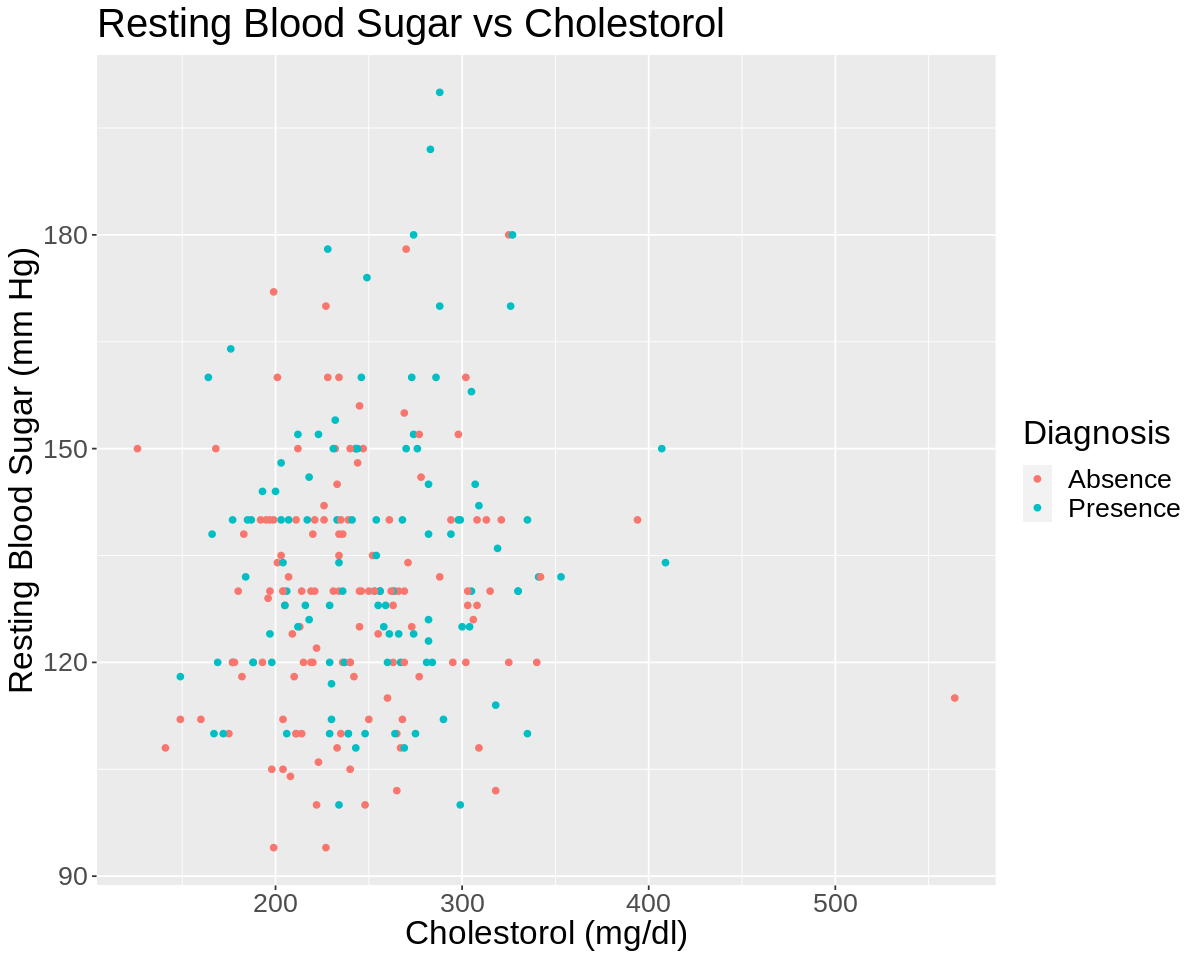

In [38]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_disease_plot <- heart_disease_train %>%
    ggplot(aes(x = cholestorol, y = resting_blood_sugar, color = diagnosis)) +
        geom_point() +
        labs(x = "Cholestorol (mg/dl)", y = "Resting Blood Sugar (mm Hg)", color = "Diagnosis") +
        theme(text = element_text(size = 20)) + 
        ggtitle("Resting Blood Sugar vs Cholestorol")

heart_disease_plot

In [37]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
    set_engine("kknn") %>%
    set_mode("classification")
# knn_spec

knn_recipe <- recipe(diagnosis ~ ., data = heart_disease) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
# knn_recipe

knn_workflow <- workflow() %>%
    add_recipe(knn_recipe) %>%
    add_model(knn_spec) 
# knn_workflow

knn_fit <- knn_workflow %>%
    fit(data = heart_disease)
# knn_fit

new_patient = tibble(age = 63, sex = 0, chest_pain_type = 3, resting_blood_sugar = 200, cholestorol = 300, fasting_blood_sugar = 0, electrocardio_results = 2, max_heart_rate = 180, exercise_induced_angina = 0, ST_depression = 0.9, ST_peak_slope = 3, major_vessels = 2, thal = 6)

prediction <- predict(knn_fit, new_patient)

prediction

.pred_class
<fct>
Presence


## Citations
https://www.cdc.gov/heartdisease/risk_factors.htm#:~:text=About%20half%20of%20all%20Americans,%2C%20high%20cholesterol%2C%20and%20smoking.&text=Some%20risk%20factors%20for%20heart,the%20factors%20you%20can%20control.

“Heart Disease Facts.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 7 Feb. 2022, https://www.cdc.gov/heartdisease/facts.htm. 